In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D , MaxPool2D, UpSampling2D
from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt

#importing the dataset
(x_train, _), (x_test, _) = mnist.load_data()

In [3]:
x_train = x_train.astype("float32") / 255
x_test =  x_test.astype("float32") / 255

x_train = np.reshape(x_train , (len(x_train), 28, 28 , 1))
x_test = np.reshape(x_test,(len(x_test), 28, 28, 1))

In [4]:
noise= 0.2

In [5]:
ll = x_train[0] + np.random.normal(size=x_train[0].shape, loc = 0.0 , scale=1.0) * noise

In [ ]:
ll

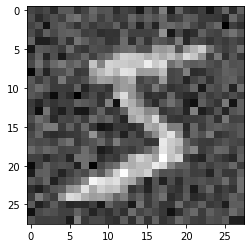

In [7]:
import matplotlib.pyplot as plt

plt.imshow(ll.reshape((28,28)), cmap='gray')

In [8]:
x_train_noisy = x_train + np.random.normal(size=(len(x_train),28,28,1), loc=0.0, scale=1.0) * noise
x_test_noisy = x_test + np.random.normal(size=(len(x_test),28,28,1) , loc=0.0, scale=1.0)* noise

In [9]:
x_train_noisy = np.clip(x_train_noisy, 0. , 1.) # set the values between 0 and 1 
x_test_noisy = np.clip(x_test_noisy, 0., 1.) # set the values between 0 and 1 

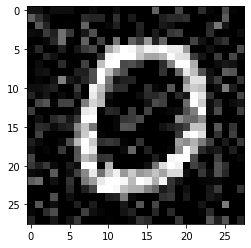

In [10]:
plt.imshow(x_test_noisy[10].reshape((28,28)), cmap="gray")

# Model

In [ ]:
model = Sequential()

#Encoder
model.add(Conv2D(32,(3,3), activation='relu', padding='same', input_shape=(28,28,1) ))
model.add(MaxPool2D((2,2), padding="same"))
model.add(Conv2D(8,(3,3), activation='relu', padding='same' ))
model.add(MaxPool2D((2,2), padding="same"))
model.add(Conv2D(8,(3,3), activation='relu', padding='same' ))


model.add(MaxPool2D((2,2), padding="same"))

#Decoder
model.add(Conv2D(8,(3,3), activation='relu', padding='same' ))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(8,(3,3), activation='relu', padding='same' ))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(32,(3,3), activation='relu' ))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(1, (3,3) , activation ='relu', padding="same"))

model.compile(optimizer= 'adam', loss="mean_squared_error") #default learning rate = 0.001

model.summary()



If we want to specify the learning rate and other parameters of our optimizer, we should call the related function (don't provide a string), exemple : 

*   ```from keras.optimizers import Adam```
* ``` model.compile(optimizer= Adam(learning_rate=float...), loss=... )```



<img src="https://drive.google.com/uc?id=1m1kFlJwrCQ1LMI-AyO3OpVUFCe-jpvEA">

In [ ]:
model.fit(x_train_noisy, x_train, epochs=10 , batch_size=256, shuffle=True, validation_data=(x_test_noisy, x_test) )

In [13]:
model.evaluate(x_test_noisy, x_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0171


0.017139462754130363

We save the model for futur uses. If we want to load it as it was trained, we can call :``` keras.models.load_model('Autoencoder_denoiser')```

In [57]:
model.save("Autoencoder_denoiser")

##Note:
Our model was trained on batches so the input for each iteration had 4 dimensions (batch size , width_image, length_image, depth_image). However, if you want to predict, you have to provide the model with a batch input (whole test set for exemple) or if you desire only one image to denoise, then expand the dimension to a batch with only one image like (1, width_image, length_image, depth_image) by doing :```
np.expand_dims(one_image, axis=0) ``` giving a shape (1, 28, 28, 1)

## Predict the test set

In [14]:
predicted_images = model.predict(x_test)

313/313 [==============================] - 2s 5ms/step


As mentioned above, we will provide the model with a batch test of 10000 images

In [15]:
predicted_images.shape

(10000, 28, 28, 1)

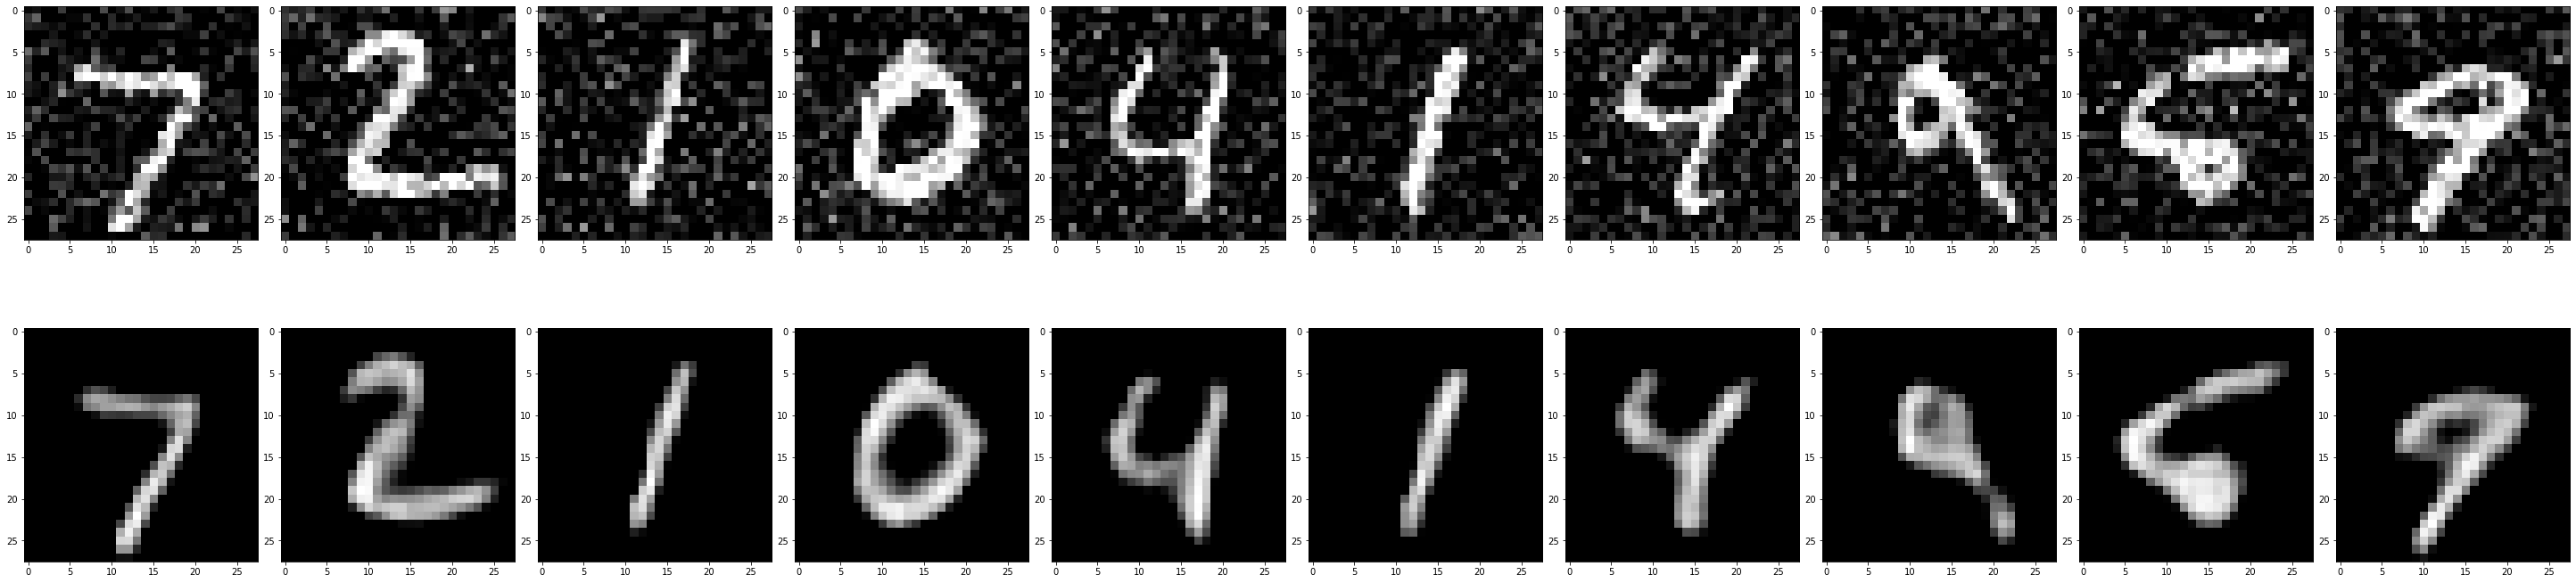

In [19]:
fig , ax = plt.subplots(2,10, figsize=(40,10), constrained_layout=True)

for i in range(0,10) : 
  
  ax[0,i].imshow(x_test_noisy[i].reshape(28,28), cmap='gray')

  ax[1,i].imshow(predicted_images[i].reshape(28,28) , cmap='gray')
  
